In [13]:
# Libraries needed
import os
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, colors
import matplotlib.pyplot as plt
import cv2
import numpy as np


# Functions Needed
def image_extract(filename, outdir):
    devil=cv2.imread(filename)
    r, g, b = cv2.split(devil)

    pixel_colors = devil.reshape((np.shape(devil)[0]*np.shape(devil)[1], 3))
    norm = colors.Normalize(vmin=-1.,vmax=1.)
    norm.autoscale(pixel_colors)
    pixel_colors = norm(pixel_colors).tolist()

    hsv_devil = cv2.cvtColor(devil, cv2.COLOR_RGB2HSV)
    h, s, v = cv2.split(hsv_devil)

    light_blue = (150, 200, 100)
    dark_blue = (200, 250, 255)


    mask = cv2.inRange(hsv_devil, light_blue, dark_blue)
    result = cv2.bitwise_and(devil, devil, mask=mask)

    
    #Check color thresholds extraction
    #lo_square = np.full((10, 10, 3), light_orange, dtype=np.uint8) / 255.0
    #do_square = np.full((10, 10, 3), dark_orange, dtype=np.uint8) / 255.0

    #Check Image Extraction
    #maskfile=os.path.basename(os.path.splitext(filename)[0]) +"masked.png"
    #plt.figure(figsize=(20, 8))
    #plt.subplot(1, 3, 1)
    #plt.imshow(devil)
    #plt.subplot(1, 3, 2)
    #plt.imshow(result)
    #plt.savefig(os.path.join(outdir, maskfile), bbox_inches='tight')
    
    return result



def ref_extract(filename):
    ref=cv2.imread(filename)
    img = cv2.cvtColor(ref, cv2.COLOR_BGR2GRAY)
    _,alpha = cv2.threshold(img,200,255,cv2.THRESH_BINARY_INV)
    b, g, r = cv2.split(ref)
    rgba = [b,g,r, alpha]
    dst = cv2.merge(rgba,4)
    return dst
    
    
def devil_plot(aggregate_file, devil_ref, vmin_man, vmax_man, pltcolor='Blues',colorcut=10, line = .3):
    cmap = cm.get_cmap(pltcolor, colorcut)    # 11 discrete colors
    plt.figure(figsize=(20, 8))
    plt.imshow(aggregate_file/1, cmap, vmin = vmin_man, vmax = vmax_man)
    plt.colorbar()
    plt.imshow(devil_ref)
    #ax=plt.gca()
    plt.grid(linestyle='-', linewidth=line, color='white')

    
def devil_plotnoaxis(aggregate_file, devil_ref, vmin_man, vmax_man, pltcolor='Blues',colorcut=10):
    cmap = cm.get_cmap(pltcolor, colorcut)    # 11 discrete colors
    plt.figure(figsize=(20, 8))
    plt.imshow(aggregate_file/1, cmap, vmin = vmin_man, vmax = vmax_man)
    plt.colorbar()
    plt.imshow(devil_ref)
    #ax=plt.gca()
    plt.grid()
    plt.axis('off')

/var/folders/js/nvmh2_897fvgtgjj70dxqgmr0000gn/T/ipykernel_27528/561098607.py:59: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(pltcolor, colorcut)    # 11 discrete colors
/var/folders/js/nvmh2_897fvgtgjj70dxqgmr0000gn/T/ipykernel_27528/561098607.py:69: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(pltcolor, colorcut)    # 11 discrete colors


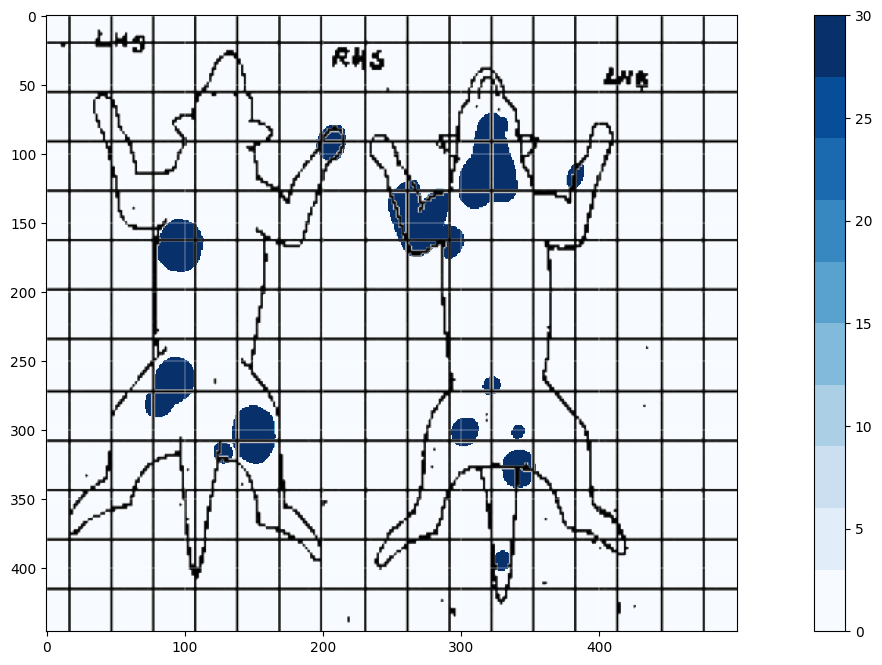

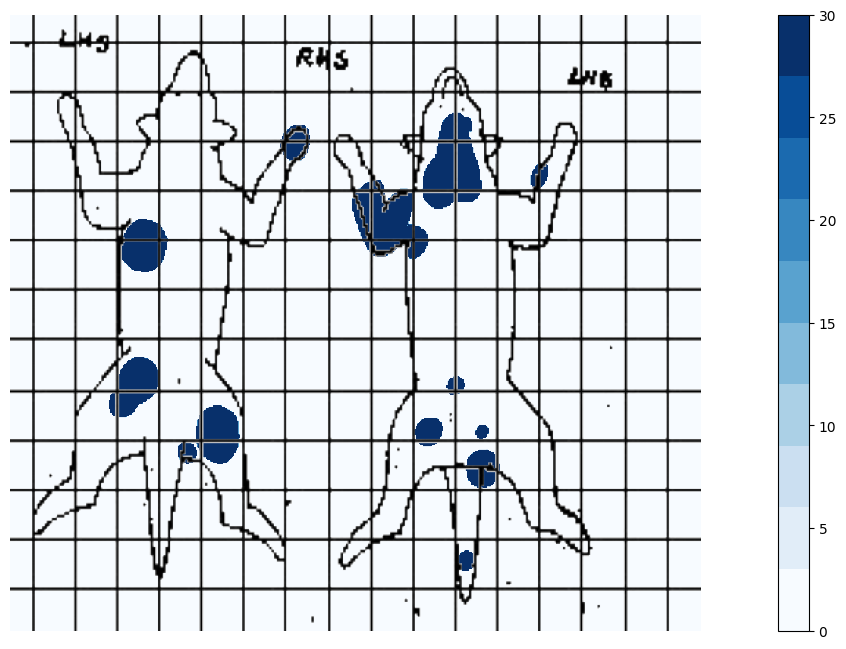

In [14]:
# Front Face
outdir = '/Users/rebeccascott/Library/CloudStorage/OneDrive-UniversityofCambridge/VETERINARY MEDICINE-Rebecca’s MacBookAir copy/Project/Devil Face Maps/Completed face stacks '
indir = "/Users/rebeccascott/Library/CloudStorage/OneDrive-UniversityofCambridge/VETERINARY MEDICINE-Rebecca’s MacBook Air copy/Project/Devil Face Maps/DFT1/Body Face maps for analyses/Body alone/Combined male and female"
ref_filename='/Users/rebeccascott/Desktop/BodyReference.jpeg'

#os.mkdir(outdir)


extracted = []
for filename in os.listdir(indir):
    #print(filename)
    if filename.endswith("jpg") or filename.endswith("jpeg"):
        filepath=os.path.join(indir, filename)
        result=image_extract(filepath, outdir)
        extracted.append(result)
    
    
    
aggregate_file = extracted[(len(extracted)-1)].sum(axis=2)
for i in range((len(extracted)-1)):
    f=extracted[i]
    x,y = f.shape[:2]
    if x==446 and y==500:
        aggregate_file = aggregate_file+extracted[i].sum(axis=2)
                              
                              
devil = ref_extract(ref_filename)

f = devil_plot(aggregate_file, devil, vmin_man=0, vmax_man = 30)
plt.savefig("/Users/rebeccascott/Library/CloudStorage/OneDrive-UniversityofCambridge/VETERINARY MEDICINE-Rebecca’s MacBook Air copy/Project/Devil Face Maps/Completed face stacks/CombinedBodyTumoursNoFaceV3?.pdf", bbox_inches='tight')

#devil_plot(aggregate_file, devil, pltcolor = "Blues", vmin_man=0, vmax_man = 30, line = .5)
devil_plotnoaxis(aggregate_file, devil,vmin_man=0, vmax_man = 30)

In [15]:
# BONUS CONTENT
# About the plot where all tumours get plotted dark blue regardless of density, I think something like this
# should work:

# 1 - Compress the tumour density to either 0 or 1 (make a copy to not overwrite the original density)
dens_copy = np.copy(density)
dens_copy[dens_copy > 0] = 1

# 2 - Plot the compressed data
fig, ax = plt.subplots()
im = ax.imshow(dens_copy, cmap = 'Blues', interpolation='nearest')
ax.imshow(devil_ref)
plt.show()

NameError: name 'density' is not defined